# Introduction

(escrever objetivo da atividade)

# Python

Python stands out as a high-level programming language. Beyond its versatility and ease of learning, Python boasts an extensive ecosystem, enabling the utilization of a myriad of diverse libraries.

# Modules, Packages and Libraries

A module serves as a repository of functions or methods. A package, in turn, comprises a set of modules. A library is an assembly of packages. Libraries facilitate code reusability by offering pre-built features for diverse problems, thereby obviating the necessity to repeatedly recreate identical code.
In this workshop, we will make use of the following libraries:

* numpy
* pandas
* scikit-learn
* tensorflow
* matplotlib
* seaborn
* plotl


Below are exemplified two ways of importing a library.y.st

In [2]:
import numpy as np
from numpy import array

In the first case, the library is imported in its entirety. In the second case, only a specific method is imported.

Import all the remaining libraries in their entirety.

# Dataset

A dataset is a compilation of data, encompassing not only tabular forms but also various types such as images, text, and more. A tabular dataset is composed of objects and features, a set of characteristics/variables of a specific object. Variables enable the storage and representation of values. In Python, there is no need to predefine the variable type.

Type of variables:
- string;
- numeric (integer or float);
- boolean;
- lists;
- tuples;
- dictionaries.


# pandas

According to its creators, "pandas is a fast, powerful, flexible and easy to use open source data analysis and manipulation tool".
(Será que é preciso explicar mais do que isto)

Types of pandas data structures:
- Series;
- Dataframes.

Series are one-dimensional arrays of data, while Dataframes are two-dimensional tabular data structures capable of storing multiple columns.

##Series

Typically, when working with simple structures like Series, one tends to use the **numpy** library.







## Dataset

In [3]:
import pandas as pd

In [4]:
opened_data = pd.read_csv("data/all_stocks_5yr.csv")

In [5]:
opened_data.head(5)

,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL


- volume: number of available stock
- date: date of evaluation
- open: value at the beginning of the day
- **close**: value at the end of the day
- high: highest price in the day
- low: lowest price in the day

In [6]:
opened_data["date"] = pd.to_datetime(opened_data["date"])
opened_data["year"] = pd.DatetimeIndex(opened_data["date"]).year
opened_data["month"] = pd.DatetimeIndex(opened_data["date"]).month
opened_data["day"] = pd.DatetimeIndex(opened_data["date"]).day

## Exercise: How many different years appear in the dataset?

In [7]:
unique_years = opened_data["year"].unique()

print("Unique years", unique_years)

Unique years [2013 2014 2015 2016 2017 2018]


## Exercise: What is the percentage of rows from 2018?

In [8]:
last_year_subset = opened_data[opened_data["year"] == 2018]
print(f"Percentage of rows relative to 2018: {round((last_year_subset.shape[0] / opened_data.shape[0]) * 100, 2)} %")

Percentage of rows relative to 2018: 2.12 %


## Exercise: What is the percentage of rows for each year?

In [9]:
for current_year in unique_years:
    current_year_subset = opened_data[opened_data["year"] == current_year]
    print(f"Percentage of rows relative to {current_year}: {round((current_year_subset.shape[0] / opened_data.shape[0]) * 100, 2)} %")

Percentage of rows relative to 2013: 17.52 %
Percentage of rows relative to 2014: 19.77 %
Percentage of rows relative to 2015: 19.99 %
Percentage of rows relative to 2016: 20.24 %
Percentage of rows relative to 2017: 20.36 %
Percentage of rows relative to 2018: 2.12 %


In [10]:
len(opened_data["Name"].unique())

505

In [11]:
trimmed_data = opened_data[["close", "Name", "year"]]

In [12]:
columns = []
for current_year in unique_years:
    current_subset = trimmed_data[trimmed_data["year"] == current_year]
    grouped_current_subset = current_subset.groupby(["Name"]).mean()
    yearly_column_name = str(current_year) + "_close"
    grouped_current_subset.columns = [yearly_column_name, "year"]
    only_data_column = grouped_current_subset.drop(columns=["year"]) 

    columns.append(only_data_column)

In [13]:
reformed_df = pd.concat(columns, axis = 1)

In [14]:
reformed_df.to_csv("data/processed_stock_data.csv")

In [15]:
reformed_df.head(5)

,2013_close,2014_close,2015_close,2016_close,2017_close,2018_close
Name,,,,,,
A,47.104823,54.119802,39.602143,43.369960,59.339641,71.471154
AAL,18.601549,38.923550,45.121607,38.183829,47.490717,54.280000
AAP,86.547699,130.955000,163.647262,155.487937,122.576494,114.789231
AAPL,67.237839,92.264531,120.039861,104.604008,150.585080,171.594231
ABBV,44.550177,55.460079,62.104246,60.668056,75.167769,106.858462


In [35]:
yearly_average_df = reformed_df.mean(axis = 0)

<Axes: >

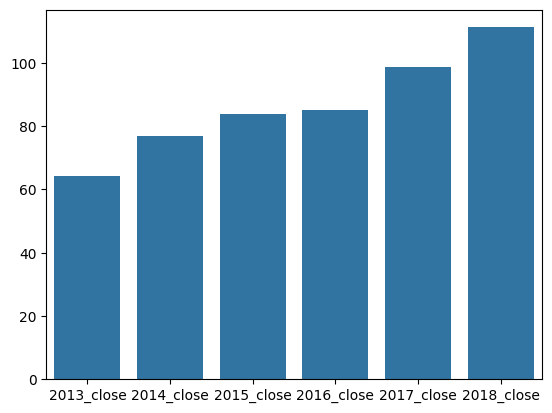

In [37]:
import seaborn as sns
sns.barplot(yearly_average_df, legend=False)

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, '2013_close'),
  Text(1, 0, '2014_close'),
  Text(2, 0, '2015_close'),
  Text(3, 0, '2016_close'),
  Text(4, 0, '2017_close'),
  Text(5, 0, '2018_close')])

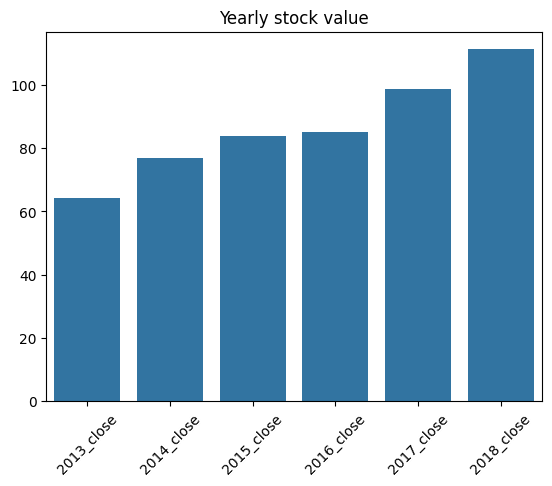

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(yearly_average_df, legend=False)
plt.title("Yearly stock value")
plt.xticks(rotation=45)

<Axes: >

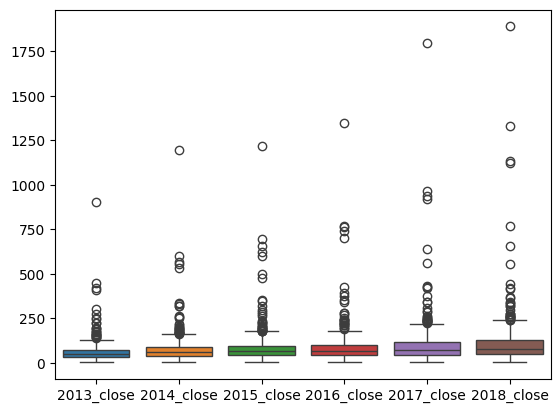

In [42]:
sns.boxplot(reformed_df)

## Exercise: Build a violinplot to further assess the distribution

<Axes: >

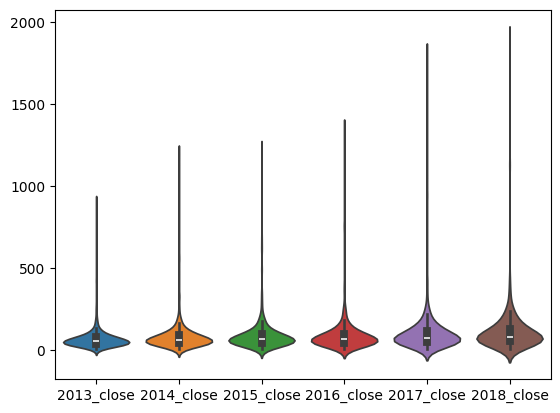

In [48]:
sns.violinplot(reformed_df)

## Exercise: Identify the top 5 stocks with highest closing in 2018 and build a lineplot with the years as the x-axis

In [45]:
sorted_df = reformed_df.sort_values(by="2018_close", ascending=False).head(5)

In [49]:
sorted_df

,2013_close,2014_close,2015_close,2016_close,2017_close,2018_close
Name,,,,,,
CHK,23.382788,25.395238,11.534841,5.173532,4.901633,3.840769
AES,13.056686,14.251111,11.998016,11.370397,11.219960,11.114615
F,15.547522,15.894405,15.002738,12.631111,11.792709,12.015000
AMD,3.463584,3.662063,2.331766,5.254782,12.411614,12.308077
UA,NaN,NaN,NaN,33.671390,17.389124,13.318846


([0, 1, 2, 3, 4, 5],
 [Text(0, 0, '2013_close'),
  Text(1, 0, '2014_close'),
  Text(2, 0, '2015_close'),
  Text(3, 0, '2016_close'),
  Text(4, 0, '2017_close'),
  Text(5, 0, '2018_close')])

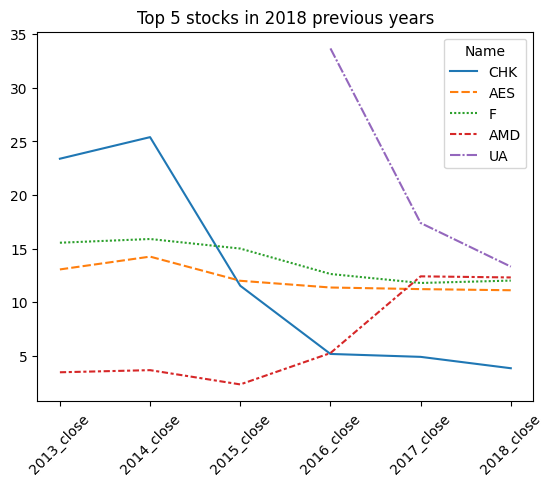

In [51]:
sns.lineplot(sorted_df.transpose())
plt.title("Top 5 stocks in 2018 previous years")
plt.xticks(rotation=45)

## Data pre-processing

### Outlier detection and handling

In [54]:
quantile_low = reformed_df["2018_close"].quantile(0.01)
quantile_high  = reformed_df["2018_close"].quantile(0.99)

reformed_df_filtered = reformed_df[(reformed_df["2018_close"] < quantile_high) & (reformed_df["2018_close"] > quantile_low)]

In [57]:
reformed_df[reformed_df["2018_close"] > quantile_high]

,2013_close,2014_close,2015_close,2016_close,2017_close,2018_close
Name,,,,,,
AMZN,301.564912,332.550976,478.138194,699.523135,968.151394,1329.184615
AZO,421.687832,534.733730,696.877976,768.858849,640.436534,770.665385
GOOGL,450.819396,568.122203,619.988234,763.214206,939.773386,1131.934615
MTD,225.781239,255.906548,318.952063,375.564921,561.722629,655.880000
PCLN,901.450283,1197.960952,1219.880952,1346.712698,1798.154542,1891.364231
GOOG,NaN,554.184891,602.461349,743.485119,921.781394,1123.490769


## Features, target variable

In [61]:
features = reformed_df.drop(columns = ["2018_close"])

In [62]:
target_variable = reformed_df["2018_close"]

## Data spliting

In [63]:
from sklearn.model_selection import train_test_split

In [64]:
train_features, test_features, train_target, test_target = train_test_split(features, target_variable, random_state = 42)

In [67]:
print(train_features.shape, test_features.shape, train_target.shape, test_target.shape)

(378, 5) (127, 5) (378,) (127,)


## Data Standardization

In [59]:
from sklearn.preprocessing import StandardScaler

In [60]:
scaler = StandardScaler()

In [68]:
scaler.fit(train_features)


StandardScaler()

In [69]:
scaled_train_features = scaler.transform(train_features)
scaled_test_features = scaler.transform(test_features)

## Machine Learning model

In [71]:
from sklearn.neighbors import KNeighborsRegressor